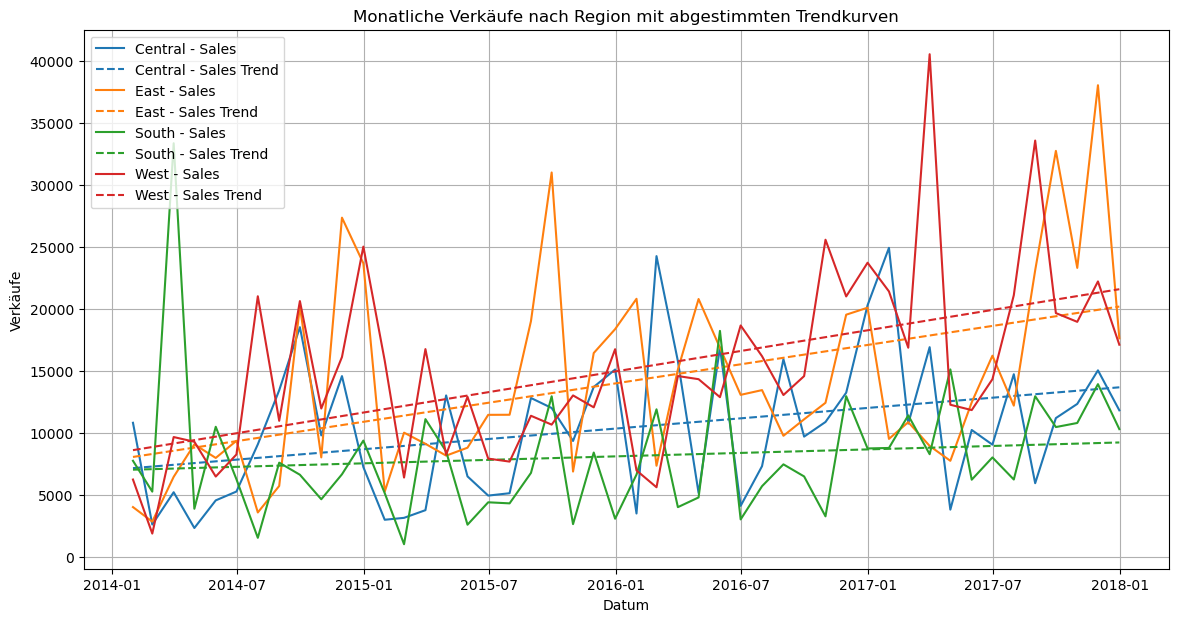

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datei laden
file_path = r"C:\Users\Michahaha\Documents\Data Analytics\timestamps\data\Retail-Supply-Chain-Sales-Dataset.xlsx"
retails_data = pd.read_excel(file_path, sheet_name='Retails Order Full Dataset')

# Zeitspalten konvertieren
retails_data['Order Date'] = pd.to_datetime(retails_data['Order Date'])

# Aggregation der Daten (monatlich und nach Region)
monthly_data = (
    retails_data.groupby([
        pd.Grouper(key='Order Date', freq='M'),  # Monatliche Gruppierung (Time Series)
        'Region'                                # Gruppierung nach Region
    ])
    .agg({'Sales': 'sum', 'Profit': 'sum'})    # Aggregation von Verkäufen und Gewinn
    .reset_index()
)

# Visualisierung
regions = monthly_data['Region'].unique()  # Separate Regionen

plt.figure(figsize=(14, 7))

for region in regions:
    # Daten für die aktuelle Region
    region_data = monthly_data[monthly_data['Region'] == region]
    
    # X und Y für die Trendberechnung (numerisch für Regression)
    x = region_data['Order Date'].map(pd.Timestamp.toordinal)  # Konvertieren in Tageszahlen
    y = region_data['Sales']
    
    # Plot der monatlichen Verkäufe
    line, = plt.plot(region_data['Order Date'], region_data['Sales'], label=f'{region} - Sales')
    
    # Farbe der aktuellen Linie extrahieren
    line_color = line.get_color()
    
    # Lineare Regression (Trendlinie)
    slope, intercept, _, _, _ = linregress(x, y)
    trendline = slope * x + intercept
    plt.plot(region_data['Order Date'], trendline, linestyle='--', color=line_color, label=f'{region} - Sales Trend')

plt.title('Monatliche Verkäufe nach Region mit abgestimmten Trendkurven')
plt.xlabel('Datum')
plt.ylabel('Verkäufe')
plt.legend()
plt.grid(True)
plt.show()
